In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
# for 2nd attempt
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping

import keras.backend as K

2024-10-31 23:20:18.742680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Setting up and training a 1d Neural Network in tensorflow

## Aim
To learn the basic notation for implementing multi-layer artificial Neural Networks using Keras/TensorFlow. The function in this case is the curve: 

$f(x) = \sin(x)$

In [2]:
# let's choose a simple 1->1 function to train
def f(x):
    return np.sin(x)**2

In [3]:
# check it works...
print(f(np.pi/2))

1.0


In [4]:
# evaluate some data points
datasize = 1000
datapoints = np.linspace(-2,2,datasize)
datavalues = f(datapoints)
data = np.transpose([datapoints,datavalues])

In [5]:
# shuffle data - important for splitting into testing and training
np.random.shuffle(data)

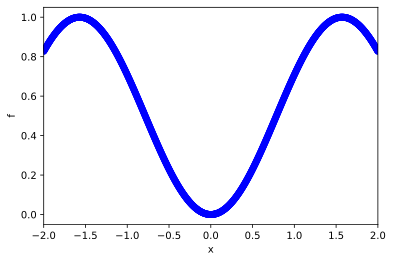

In [6]:
# plot the data points to see how they are distributed
plt.plot(datapoints, datavalues, 'bo')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

In [7]:
# Initialise model: 1-N-1
hiddenlayerdepth = 4
model = Sequential([
    Dense(hiddenlayerdepth, activation='tanh', input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

2024-10-31 23:20:28.544407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# demonstration of how to take slices of numpy arrays
print(data[0:2,0])
print(data[0:2,1])
print(f(1.20030495))

[-0.89489489 -1.51151151]
[0.60862362 0.99648943]
0.8689027716812022


In [9]:
## split into testing and training sets 20:80
print(len(data))
split = int(len(data)*80/100)
print(split)

1000
800


In [10]:
# fit the model with the data and save the information about the training
history = model.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=150,
    validation_data=(data[split:,0], data[split:,1]),
    verbose=1
)

Epoch 1/150
25/25 [==============================] - 1s 9ms/step - loss: 0.6126 - val_loss: 0.4887
Epoch 2/150
25/25 [==============================] - 0s 4ms/step - loss: 0.5111 - val_loss: 0.4085
Epoch 3/150
25/25 [==============================] - 0s 4ms/step - loss: 0.4303 - val_loss: 0.3478
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3694 - val_loss: 0.3003
Epoch 5/150
25/25 [==============================] - 0s 4ms/step - loss: 0.3215 - val_loss: 0.2649
Epoch 6/150
25/25 [==============================] - 0s 4ms/step - loss: 0.2842 - val_loss: 0.2384
Epoch 7/150
25/25 [==============================] - 0s 4ms/step - loss: 0.2561 - val_loss: 0.2176
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.2338 - val_loss: 0.2022
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.2169 - val_loss: 0.1906
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.2041 - val_loss: 0.1819
Epoch 11/

25/25 [==============================] - 0s 3ms/step - loss: 0.0254 - val_loss: 0.0243
Epoch 84/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0230
Epoch 85/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.0217
Epoch 86/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.0205
Epoch 87/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.0195
Epoch 88/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0183
Epoch 89/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0173
Epoch 90/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0163
Epoch 91/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0154
Epoch 92/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0145
Epoch 93/150


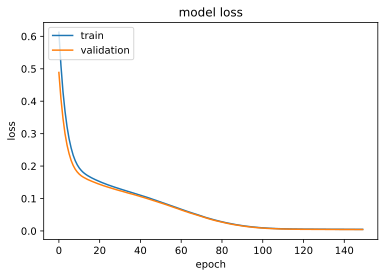

In [11]:
# now we can plot the history to see how the loss function for the
# training and validation set changed with epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
print(model.predict([1]))
print(f(1))

print(model.predict([0.1]))
print(f(0.1))

1/1 [==============================] - 0s 126ms/step
[[0.63078225]]
0.7080734182735712
1/1 [==============================] - 0s 81ms/step
[[0.0623391]]
0.009966711079379185


In [13]:
datapoints2 = np.linspace(-2,2,1000)
datavalues2 = f(datapoints2)
datavaluespred = model.predict(datapoints2)

32/32 [==============================] - 0s 2ms/step


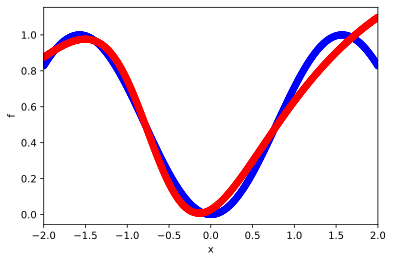

In [14]:
plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Let's try again with a more complicated model

In [48]:
# try again with early stopping criteria
tf.keras.backend.clear_session()

In [49]:
# Initialise model: 1-8-4-1
model2 = Sequential([
    Dense(8, activation='tanh', input_shape=(1,)),
    Dense(4, activation='tanh'),
    Dense(1)
])

model2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

In [50]:
ES = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=2,
    restore_best_weights=True)

history2 = model2.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=2000,
    validation_data=(data[split:,0], data[split:,1]),
    callbacks=[ES],
    batch_size=128,
    verbose=1
)

Epoch 1/2000
7/7 [==============================] - 1s 62ms/step - loss: 1.6415 - val_loss: 1.3581
Epoch 2/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.4629 - val_loss: 1.2034
Epoch 3/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.2978 - val_loss: 1.0601
Epoch 4/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.1483 - val_loss: 0.9292
Epoch 5/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.0106 - val_loss: 0.8134
Epoch 6/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.8866 - val_loss: 0.7113
Epoch 7/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.7786 - val_loss: 0.6212
Epoch 8/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.6795 - val_loss: 0.5422
Epoch 9/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.5941 - val_loss: 0.4718
Epoch 10/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.5194 - val_loss: 0.4111
Epoch 11/2000
7/7 

Epoch 84/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0849 - val_loss: 0.0788
Epoch 85/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0833 - val_loss: 0.0776
Epoch 86/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0819 - val_loss: 0.0763
Epoch 87/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0805 - val_loss: 0.0750
Epoch 88/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0791 - val_loss: 0.0736
Epoch 89/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0776 - val_loss: 0.0721
Epoch 90/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0761 - val_loss: 0.0708
Epoch 91/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0746 - val_loss: 0.0694
Epoch 92/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0732 - val_loss: 0.0680
Epoch 93/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0717 - val_loss: 0.0665
Epoch 94/2

7/7 [==============================] - 0s 12ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 167/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 168/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0065
Epoch 169/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 170/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 171/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 172/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 173/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - val_loss: 0.0060
Epoch 174/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 175/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 176/2

7/7 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 249/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 250/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 251/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 252/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 253/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 254/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 255/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 256/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 257/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 258/2000

7/7 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 331/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 332/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 333/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 334/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 335/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 336/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 337/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 338/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 339/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 340/2000


7/7 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 413/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 414/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 415/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 416/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 417/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 418/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 419/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 420/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 421/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 422/2000


7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 495/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 496/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 497/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 498/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 499/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 500/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 501/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 502/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 503/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 504/2000

7/7 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 577/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 578/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 579/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 580/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 581/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 582/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 583/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 584/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 585/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 586/2000


7/7 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 659/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 660/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 661/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 662/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 663/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 664/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 665/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 666/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 667/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 668/2000


7/7 [==============================] - 0s 7ms/step - loss: 8.9215e-04 - val_loss: 6.8028e-04
Epoch 737/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.8683e-04 - val_loss: 6.8089e-04
Epoch 738/2000
7/7 [==============================] - 0s 7ms/step - loss: 8.8402e-04 - val_loss: 6.7353e-04
Epoch 739/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.7373e-04 - val_loss: 6.7883e-04
Epoch 740/2000
7/7 [==============================] - 0s 8ms/step - loss: 8.7846e-04 - val_loss: 6.6779e-04
Epoch 741/2000
7/7 [==============================] - 0s 8ms/step - loss: 8.6659e-04 - val_loss: 6.6719e-04
Epoch 742/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.6381e-04 - val_loss: 6.5951e-04
Epoch 743/2000
7/7 [==============================] - 0s 7ms/step - loss: 8.6190e-04 - val_loss: 6.5597e-04
Epoch 744/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.5588e-04 - val_loss: 6.5715e-04
Epoch 745/2000
7/7 [=======================

Epoch 812/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.3091e-04 - val_loss: 4.7895e-04
Epoch 813/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.3298e-04 - val_loss: 4.7486e-04
Epoch 814/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.2339e-04 - val_loss: 4.8186e-04
Epoch 815/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.3612e-04 - val_loss: 4.7972e-04
Epoch 816/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.3567e-04 - val_loss: 4.7541e-04
Epoch 817/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.1746e-04 - val_loss: 4.9181e-04
Epoch 818/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.3554e-04 - val_loss: 4.6806e-04
Epoch 819/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.3919e-04 - val_loss: 4.6792e-04
Epoch 820/2000
7/7 [==============================] - 0s 8ms/step - loss: 6.2108e-04 - val_loss: 4.7711e-04
Epoch 821/2000
7/7 [========

Epoch 888/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.0296e-04 - val_loss: 3.8750e-04
Epoch 889/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.0794e-04 - val_loss: 3.8483e-04
Epoch 890/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.0660e-04 - val_loss: 3.8974e-04
Epoch 891/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.0358e-04 - val_loss: 3.8657e-04
Epoch 892/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.0732e-04 - val_loss: 3.9917e-04
Epoch 893/2000
7/7 [==============================] - 0s 10ms/step - loss: 5.0061e-04 - val_loss: 3.8439e-04
Epoch 894/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.0324e-04 - val_loss: 3.8266e-04
Epoch 895/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.0082e-04 - val_loss: 3.7851e-04
Epoch 896/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.0325e-04 - val_loss: 3.8430e-04
Epoch 897/2000
7/7 [=======

Epoch 964/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.1778e-04 - val_loss: 3.2355e-04
Epoch 965/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.1914e-04 - val_loss: 3.4307e-04
Epoch 966/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.2269e-04 - val_loss: 3.2412e-04
Epoch 967/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.1785e-04 - val_loss: 3.3751e-04
Epoch 968/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.2407e-04 - val_loss: 3.2000e-04
Epoch 969/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.3267e-04 - val_loss: 3.2583e-04
Epoch 970/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.3682e-04 - val_loss: 3.2516e-04
Epoch 971/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.1284e-04 - val_loss: 3.2586e-04
Epoch 972/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.2484e-04 - val_loss: 3.2227e-04
Epoch 973/2000
7/7 [========

7/7 [==============================] - 0s 11ms/step - loss: 3.4793e-04 - val_loss: 2.6365e-04
Epoch 1040/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.4493e-04 - val_loss: 2.6518e-04
Epoch 1041/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.4355e-04 - val_loss: 2.7415e-04
Epoch 1042/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.5041e-04 - val_loss: 2.6906e-04
Epoch 1043/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.5690e-04 - val_loss: 2.6468e-04
Epoch 1044/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.5147e-04 - val_loss: 2.7658e-04
Epoch 1045/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.4372e-04 - val_loss: 2.6387e-04
Epoch 1046/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.4178e-04 - val_loss: 2.6426e-04
Epoch 1047/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.4131e-04 - val_loss: 2.6638e-04
Epoch 1048/2000
7/7 [=============

7/7 [==============================] - 0s 9ms/step - loss: 2.7678e-04 - val_loss: 2.1707e-04
Epoch 1115/2000
7/7 [==============================] - 0s 8ms/step - loss: 2.7762e-04 - val_loss: 2.0961e-04
Epoch 1116/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.7823e-04 - val_loss: 2.2116e-04
Epoch 1117/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.8160e-04 - val_loss: 2.3398e-04
Epoch 1118/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.8783e-04 - val_loss: 2.2188e-04
Epoch 1119/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.8215e-04 - val_loss: 2.1457e-04
Epoch 1120/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.7994e-04 - val_loss: 2.1204e-04
Epoch 1121/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.7123e-04 - val_loss: 2.0644e-04
Epoch 1122/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.6980e-04 - val_loss: 2.1415e-04
Epoch 1123/2000
7/7 [==============

7/7 [==============================] - 0s 7ms/step - loss: 2.1397e-04 - val_loss: 1.6031e-04
Epoch 1190/2000
7/7 [==============================] - 0s 8ms/step - loss: 2.1340e-04 - val_loss: 1.7303e-04
Epoch 1191/2000
7/7 [==============================] - 0s 8ms/step - loss: 2.1598e-04 - val_loss: 1.6244e-04
Epoch 1192/2000
7/7 [==============================] - 0s 8ms/step - loss: 2.1305e-04 - val_loss: 1.5978e-04
Epoch 1193/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.1008e-04 - val_loss: 1.7285e-04
Epoch 1194/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.1444e-04 - val_loss: 1.5972e-04
Epoch 1195/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.1037e-04 - val_loss: 1.6294e-04
Epoch 1196/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.0950e-04 - val_loss: 1.6270e-04
Epoch 1197/2000
7/7 [==============================] - 0s 9ms/step - loss: 2.1352e-04 - val_loss: 1.7943e-04
Epoch 1198/2000
7/7 [==============

7/7 [==============================] - 0s 7ms/step - loss: 1.6156e-04 - val_loss: 1.2405e-04
Epoch 1265/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.5974e-04 - val_loss: 1.2125e-04
Epoch 1266/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.6417e-04 - val_loss: 1.2166e-04
Epoch 1267/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.6078e-04 - val_loss: 1.4113e-04
Epoch 1268/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.6580e-04 - val_loss: 1.1653e-04
Epoch 1269/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.5931e-04 - val_loss: 1.2083e-04
Epoch 1270/2000
7/7 [==============================] - 0s 11ms/step - loss: 1.5737e-04 - val_loss: 1.1955e-04
Epoch 1271/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.5884e-04 - val_loss: 1.1542e-04
Epoch 1272/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.5337e-04 - val_loss: 1.1311e-04
Epoch 1273/2000
7/7 [=============

7/7 [==============================] - 0s 8ms/step - loss: 1.2020e-04 - val_loss: 8.9602e-05
Epoch 1340/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1951e-04 - val_loss: 8.5939e-05
Epoch 1341/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.1495e-04 - val_loss: 8.5328e-05
Epoch 1342/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.1438e-04 - val_loss: 8.6618e-05
Epoch 1343/2000
7/7 [==============================] - 0s 17ms/step - loss: 1.1345e-04 - val_loss: 8.2975e-05
Epoch 1344/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.1241e-04 - val_loss: 8.2452e-05
Epoch 1345/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.1181e-04 - val_loss: 8.1882e-05
Epoch 1346/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.1148e-04 - val_loss: 8.4791e-05
Epoch 1347/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.1244e-04 - val_loss: 8.5777e-05
Epoch 1348/2000
7/7 [=============

7/7 [==============================] - 0s 6ms/step - loss: 8.3654e-05 - val_loss: 6.0871e-05
Epoch 1415/2000
7/7 [==============================] - 0s 7ms/step - loss: 8.3200e-05 - val_loss: 5.8827e-05
Epoch 1416/2000
7/7 [==============================] - 0s 7ms/step - loss: 8.7454e-05 - val_loss: 7.3343e-05
Epoch 1417/2000
7/7 [==============================] - 0s 7ms/step - loss: 8.7767e-05 - val_loss: 5.9256e-05
Epoch 1418/2000
7/7 [==============================] - 0s 8ms/step - loss: 8.1576e-05 - val_loss: 6.0610e-05
Epoch 1419/2000
7/7 [==============================] - 0s 7ms/step - loss: 8.0983e-05 - val_loss: 5.7354e-05
Epoch 1420/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.0722e-05 - val_loss: 6.1817e-05
Epoch 1421/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.9741e-05 - val_loss: 6.0273e-05
Epoch 1422/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.3085e-05 - val_loss: 5.7947e-05
Epoch 1423/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 6.2598e-05 - val_loss: 4.0580e-05
Epoch 1490/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.0733e-05 - val_loss: 4.3310e-05
Epoch 1491/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.9608e-05 - val_loss: 4.2121e-05
Epoch 1492/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.8548e-05 - val_loss: 3.9947e-05
Epoch 1493/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.0681e-05 - val_loss: 5.2110e-05
Epoch 1494/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.2920e-05 - val_loss: 4.0446e-05
Epoch 1495/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.8765e-05 - val_loss: 4.0333e-05
Epoch 1496/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.6983e-05 - val_loss: 3.9680e-05
Epoch 1497/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.8530e-05 - val_loss: 3.8332e-05
Epoch 1498/2000
7/7 [==============

7/7 [==============================] - 0s 7ms/step - loss: 4.3222e-05 - val_loss: 3.1844e-05
Epoch 1565/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.3146e-05 - val_loss: 2.9168e-05
Epoch 1566/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.3062e-05 - val_loss: 3.0705e-05
Epoch 1567/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.2663e-05 - val_loss: 3.2063e-05
Epoch 1568/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.2356e-05 - val_loss: 2.9233e-05
Epoch 1569/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.5205e-05 - val_loss: 3.3484e-05
Epoch 1570/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.6230e-05 - val_loss: 3.2964e-05
Epoch 1571/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.9328e-05 - val_loss: 2.8004e-05
Epoch 1572/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.3631e-05 - val_loss: 3.0429e-05
Epoch 1573/2000
7/7 [==============

7/7 [==============================] - 0s 7ms/step - loss: 3.7289e-05 - val_loss: 2.7138e-05
Epoch 1640/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.6030e-05 - val_loss: 2.7268e-05
Epoch 1641/2000
7/7 [==============================] - 0s 7ms/step - loss: 4.0960e-05 - val_loss: 2.7964e-05
Epoch 1642/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.0416e-05 - val_loss: 4.0295e-05
Epoch 1643/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.8375e-05 - val_loss: 2.3446e-05
Epoch 1644/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.5894e-05 - val_loss: 2.3939e-05
Epoch 1645/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.5545e-05 - val_loss: 2.6280e-05
Epoch 1646/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.6051e-05 - val_loss: 2.4896e-05
Epoch 1647/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.4049e-05 - val_loss: 2.3191e-05
Epoch 1648/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 3.0590e-05 - val_loss: 2.2110e-05
Epoch 1715/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.0391e-05 - val_loss: 2.3077e-05
Epoch 1716/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.9495e-05 - val_loss: 1.9702e-05
Epoch 1717/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.7972e-05 - val_loss: 2.0105e-05
Epoch 1718/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.8120e-05 - val_loss: 2.0146e-05
Epoch 1719/2000
7/7 [==============================] - 0s 10ms/step - loss: 2.9649e-05 - val_loss: 2.0531e-05
Epoch 1720/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.9505e-05 - val_loss: 2.5958e-05
Epoch 1721/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.9652e-05 - val_loss: 2.6950e-05
Epoch 1722/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.2898e-05 - val_loss: 2.4894e-05
Epoch 1723/2000
7/7 [=============

7/7 [==============================] - 0s 6ms/step - loss: 3.2002e-05 - val_loss: 2.0537e-05
Epoch 1790/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.7304e-05 - val_loss: 1.8606e-05
Epoch 1791/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.5979e-05 - val_loss: 1.7928e-05
Epoch 1792/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.5999e-05 - val_loss: 2.0564e-05
Epoch 1793/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.5372e-05 - val_loss: 1.7631e-05
Epoch 1794/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.4408e-05 - val_loss: 1.9512e-05
Epoch 1795/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.7569e-05 - val_loss: 1.8837e-05
Epoch 1796/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.8541e-05 - val_loss: 2.1283e-05
Epoch 1797/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.8010e-05 - val_loss: 1.7676e-05
Epoch 1798/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 2.1820e-05 - val_loss: 1.7152e-05
Epoch 1865/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.2393e-05 - val_loss: 1.6033e-05
Epoch 1866/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.2477e-05 - val_loss: 2.1021e-05
Epoch 1867/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.3799e-05 - val_loss: 1.6562e-05
Epoch 1868/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.4766e-05 - val_loss: 2.3671e-05
Epoch 1869/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.6360e-05 - val_loss: 1.6547e-05
Epoch 1870/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.4674e-05 - val_loss: 2.4027e-05
Epoch 1871/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.6206e-05 - val_loss: 1.8100e-05
Epoch 1872/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.9267e-05 - val_loss: 2.7667e-05
Epoch 1873/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 2.2282e-05 - val_loss: 1.5887e-05
Epoch 1940/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.1617e-05 - val_loss: 2.2251e-05
Epoch 1941/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.4933e-05 - val_loss: 2.7066e-05
Epoch 1942/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.1996e-05 - val_loss: 1.9278e-05
Epoch 1943/2000
7/7 [==============================] - 0s 11ms/step - loss: 2.1492e-05 - val_loss: 1.4139e-05
Epoch 1944/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.0656e-05 - val_loss: 2.3264e-05
Epoch 1945/2000
7/7 [==============================] - 0s 9ms/step - loss: 2.4499e-05 - val_loss: 1.4062e-05
Epoch 1946/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.2773e-05 - val_loss: 2.2331e-05
Epoch 1947/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.5377e-05 - val_loss: 1.8914e-05
Epoch 1948/2000
7/7 [=============

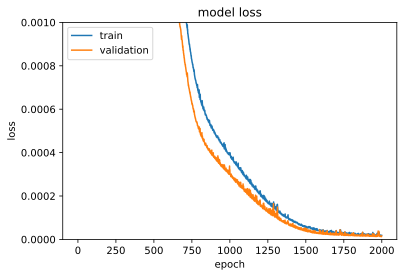

In [51]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0,0.001])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 2ms/step


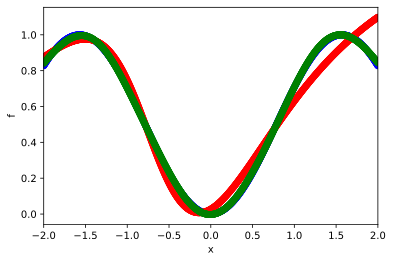

In [52]:
datavaluespred2 = model2.predict(datapoints2)

plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.plot(datapoints2, datavaluespred2, 'go')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Questions

1. Is 5000 points a sensible sample size? How do the fits change if you reduce or increase the data set?
2. Is the 2nd model better of worse the the simple model with one hidden layer? What if we increase the number of nodes in the single hidden layer of the first model?
3. What does the argument 'batch_size' do? What is a good value that optimises the training?
4. Vary the early stopping parameters to see how they effect the training
5. What is the effect of changing the activation function?